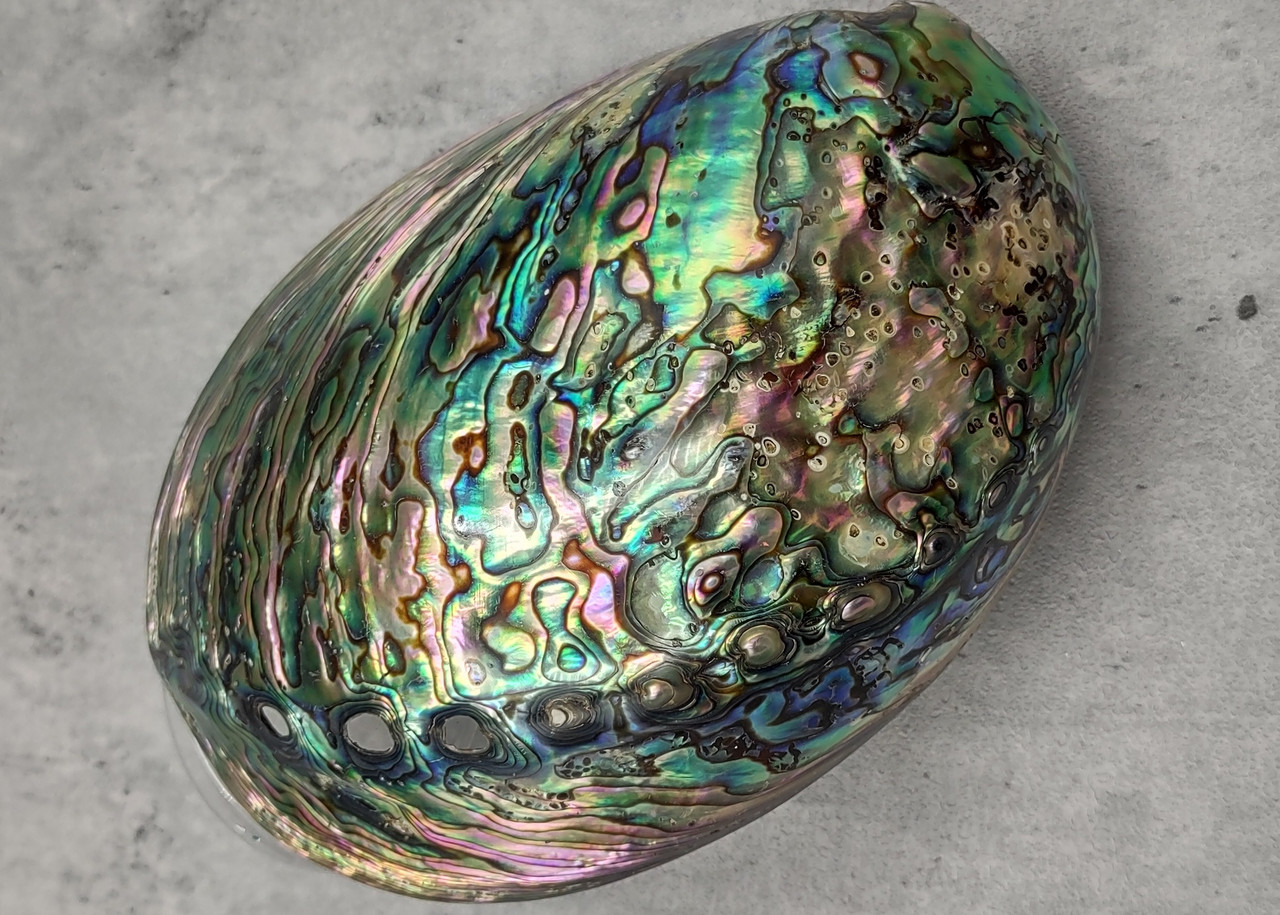

In [274]:
from IPython.display import Image
Image("abalone.jpg", width=200, height=100)

In [275]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

abalone = pd.read_csv("./data/abalone.csv")

df = abalone

abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Choose target value

In [276]:
abalone["Rings"]

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

# Encode the categorical features

In [277]:
abalone["Sex"] = abalone["Sex"].astype('category')
abalone["Sex"] = abalone["Sex"].cat.codes
abalone["Sex"]

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int8

## TASK 4


In [278]:
from scipy import stats
from sklearn.calibration import LabelEncoder


data_copy = abalone.copy()

numerical_cols = data_copy.select_dtypes(include=[np.number]).columns
data_copy[numerical_cols] = data_copy[numerical_cols].apply(np.log1p)

z_scores = np.abs(stats.zscore(data_copy[numerical_cols]))
data_copy = data_copy[(z_scores < 3).all(axis=1)]

categorical_cols = data_copy.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data_copy[col] = le.fit_transform(data_copy[col])


In [279]:
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [280]:

from sklearn.model_selection import train_test_split

X = abalone.drop('Sex', axis=1)
Y = abalone['Sex']

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3341, 8) (3341,) (836, 8) (836,)


In [281]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [282]:

from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

logReg = LogisticRegression(max_iter=1000)
logReg.fit(X_train, Y_train)

yp_logreg = logReg.predict(X_test)
mean_absolute_error(Y_test, yp_logreg)

0.680622009569378

Accuracy: 0.5717703349282297
F1 Score: 0.5717703349282297
Precision: 0.5717703349282297
Recall: 0.5717703349282297
Confusion Matrix:


<AxesSubplot:>

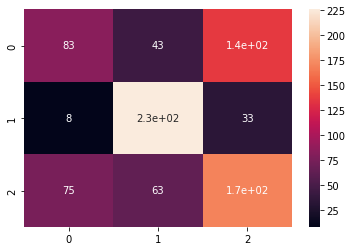

In [283]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

accuracy = accuracy_score(Y_test, yp_logreg)
print("Accuracy:", accuracy)

f1 = f1_score(Y_test, yp_logreg, average='micro')
print("F1 Score:", f1)

precision = precision_score(Y_test, yp_logreg, average='micro')
print("Precision:", precision)

recall = recall_score(Y_test, yp_logreg, average='micro')
print("Recall:", recall)

conf_matrix = confusion_matrix(Y_test, yp_logreg)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True)

In [284]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

logReg_cv = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_score = cross_val_score(logReg_cv, X, Y, cv=kf, scoring="neg_mean_absolute_error")

print("Cross-Validation Scores:", lr_score)

lr_score_n = -lr_score
print("Mean Negative MAE:", lr_score_n.mean())


Cross-Validation Scores: [-0.67822967 -0.69497608 -0.7005988  -0.69700599 -0.68862275]
Mean Negative MAE: 0.6918866573073947


In [285]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)

yp_LDA = LDA.predict(X_test)
mean_absolute_error(Y_test, yp_LDA)


0.7248803827751196

Accuracy: 0.5454545454545454
F1 Score: 0.5454545454545454
Precision: 0.5454545454545454
Recall: 0.5454545454545454
Confusion Matrix:


<AxesSubplot:>

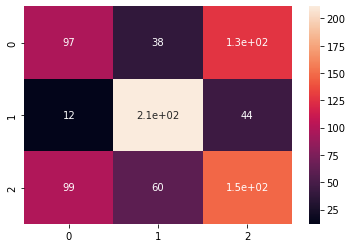

In [286]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

accuracy = accuracy_score(Y_test, yp_LDA)
print("Accuracy:", accuracy)

f1 = f1_score(Y_test, yp_LDA, average='micro')
print("F1 Score:", f1)

precision = precision_score(Y_test, yp_LDA, average='micro')
print("Precision:", precision)

recall = recall_score(Y_test, yp_LDA, average='micro')
print("Recall:", recall)

conf_matrix = confusion_matrix(Y_test, yp_LDA)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True)

In [287]:

LDA_cv = LinearDiscriminantAnalysis()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lda_score = cross_val_score(LDA_cv, X, Y, cv=kf, scoring="neg_mean_absolute_error")

print("Cross-Validation Scores:", lda_score)

lda_score_n = -lda_score
print("Mean Negative MAE:", lda_score_n.mean())


Cross-Validation Scores: [-0.72488038 -0.69736842 -0.73532934 -0.72215569 -0.70179641]
Mean Negative MAE: 0.7163060481906999


In [288]:
print(Y_train)

4038    1
1272    1
3384    0
3160    1
3894    2
       ..
3444    0
466     0
3092    2
3772    2
860     0
Name: Sex, Length: 3341, dtype: int8


In [289]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, Y_train) # Multiclass deer hiij uzegu bolohor sain medehgu bn

yp_QDA = QDA.predict(X_test)
mean_absolute_error(Y_test, yp_QDA)

0.666267942583732

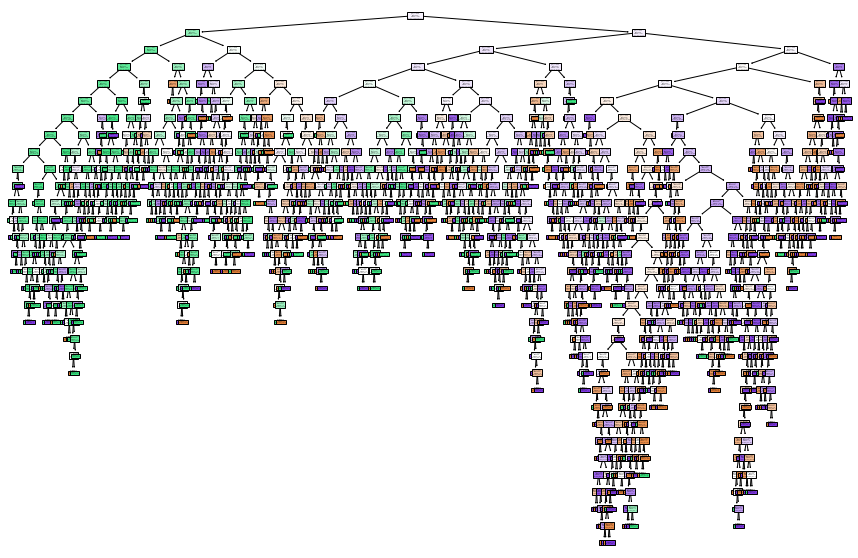

In [290]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, Y_train)

yp_DTC = dtc.predict(X_test)


plt.figure(figsize=(15, 10))
plot_tree(dtc, filled=True)
plt.show()


Accuracy: 0.3229665071770335
F1 Score: 0.3229665071770335
Precision: 0.3229665071770335
Recall: 0.3229665071770335
Confusion Matrix:


<AxesSubplot:>

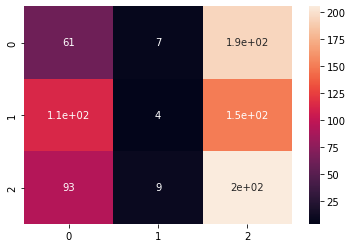

In [291]:
accuracy = accuracy_score(Y_test, yp_DTC)
print("Accuracy:", accuracy)

f1 = f1_score(Y_test, yp_DTC, average='micro')
print("F1 Score:", f1)

precision = precision_score(Y_test, yp_DTC, average='micro')
print("Precision:", precision)

recall = recall_score(Y_test, yp_DTC, average='micro')
print("Recall:", recall)

conf_matrix = confusion_matrix(Y_test, yp_DTC)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True)

In [292]:
DTC_cv = DecisionTreeClassifier()
dtc_score = cross_val_score(DTC_cv, X, Y, cv=7, scoring="neg_mean_absolute_error")

print(dtc_score)
dtc_score_n = -dtc_score
print(dtc_score_n.mean())

[-0.84087102 -0.73869347 -0.80569514 -0.75041876 -0.77721943 -0.79362416
 -0.77181208]
0.7826191520080428


In [293]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier() #parameter utguudaa oorchilj uzeh
RFC.fit(X_train, Y_train)

yp_RFC = RFC.predict(X_test)
mean_absolute_error(Y_test, yp_RFC)

0.7248803827751196

Accuracy: 0.5526315789473685
F1 Score: 0.5526315789473685
Precision: 0.5526315789473685
Recall: 0.5526315789473685
Confusion Matrix:


<AxesSubplot:>

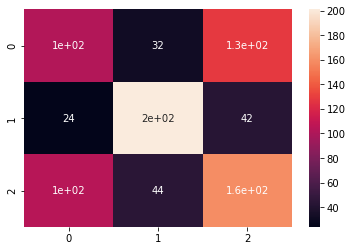

In [294]:
accuracy = accuracy_score(Y_test, yp_RFC)
print("Accuracy:", accuracy)

f1 = f1_score(Y_test, yp_RFC, average='micro')
print("F1 Score:", f1)

precision = precision_score(Y_test, yp_RFC, average='micro')
print("Precision:", precision)

recall = recall_score(Y_test, yp_RFC, average='micro')
print("Recall:", recall)

conf_matrix = confusion_matrix(Y_test, yp_RFC)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True)

In [295]:
RFC_cv = RandomForestClassifier()
RFC_score = cross_val_score(RFC_cv, X, Y, cv=7, scoring="neg_mean_absolute_error")

print(RFC_score)
RFC_score_n = -RFC_score
print(RFC_score_n.mean())

[-0.77554439 -0.66666667 -0.78559464 -0.77554439 -0.70184255 -0.76845638
 -0.7466443 ]
0.745756185850955
